In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Preprocessing**

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/bda/weather.csv')

In [4]:
df.head(5)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No


In [5]:
df.tail(5)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
361,9.0,30.7,0.0,7.6,12.1,NNW,76.0,SSE,NW,7.0,...,15,1016.1,1010.8,1,3,20.4,30.0,No,0.0,No
362,7.1,28.4,0.0,11.6,12.7,N,48.0,NNW,NNW,2.0,...,22,1020.0,1016.9,0,1,17.2,28.2,No,0.0,No
363,12.5,19.9,0.0,8.4,5.3,ESE,43.0,ENE,ENE,11.0,...,47,1024.0,1022.8,3,2,14.5,18.3,No,0.0,No
364,12.5,26.9,0.0,5.0,7.1,NW,46.0,SSW,WNW,6.0,...,39,1021.0,1016.2,6,7,15.8,25.9,No,0.0,No
365,12.3,30.2,0.0,6.0,12.6,NW,78.0,NW,WNW,31.0,...,13,1009.6,1009.2,1,1,23.8,28.6,No,0.0,No


In [6]:
df.shape

(366, 22)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        366 non-null    float64
 1   MaxTemp        366 non-null    float64
 2   Rainfall       366 non-null    float64
 3   Evaporation    366 non-null    float64
 4   Sunshine       363 non-null    float64
 5   WindGustDir    363 non-null    object 
 6   WindGustSpeed  364 non-null    float64
 7   WindDir9am     335 non-null    object 
 8   WindDir3pm     365 non-null    object 
 9   WindSpeed9am   359 non-null    float64
 10  WindSpeed3pm   366 non-null    int64  
 11  Humidity9am    366 non-null    int64  
 12  Humidity3pm    366 non-null    int64  
 13  Pressure9am    366 non-null    float64
 14  Pressure3pm    366 non-null    float64
 15  Cloud9am       366 non-null    int64  
 16  Cloud3pm       366 non-null    int64  
 17  Temp9am        366 non-null    float64
 18  Temp3pm   

In [8]:
df.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

In [9]:
df.isnull().sum()

MinTemp           0
MaxTemp           0
Rainfall          0
Evaporation       0
Sunshine          3
WindGustDir       3
WindGustSpeed     2
WindDir9am       31
WindDir3pm        1
WindSpeed9am      7
WindSpeed3pm      0
Humidity9am       0
Humidity3pm       0
Pressure9am       0
Pressure3pm       0
Cloud9am          0
Cloud3pm          0
Temp9am           0
Temp3pm           0
RainToday         0
RISK_MM           0
RainTomorrow      0
dtype: int64

In [10]:
df['Sunshine'] = df['Sunshine'].fillna(df['Sunshine'].mean())
df['WindGustDir'] = df['WindGustDir'].fillna(df['WindGustDir'].mode()[0])
df['WindGustSpeed'] = df['WindGustSpeed'].fillna(df['WindGustSpeed'].mean())
df['WindDir9am'] = df['WindDir9am'].fillna(df['WindDir9am'].mode()[0])
df['WindDir3pm'] = df['WindDir3pm'].fillna(df['WindDir3pm'].mode()[0])
df['WindSpeed9am'] = df['WindSpeed9am'].fillna(df['WindSpeed9am'].mean())

In [11]:
df['RainTomorrow'] = df['RainTomorrow'].replace({'Yes': 1, 'No': 0})
df['RainToday'] = df['RainToday'].replace({'Yes': 1, 'No': 0})

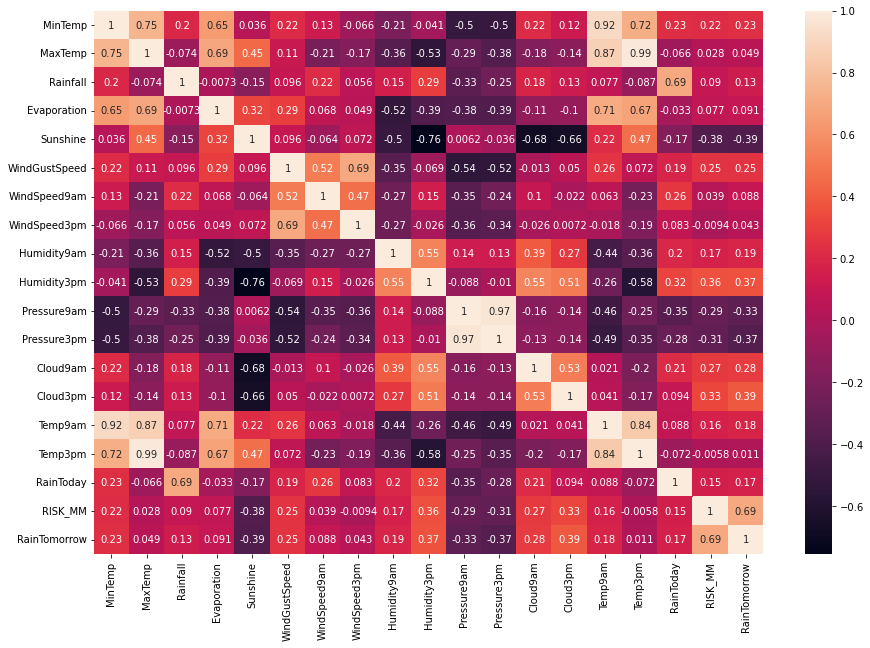

In [12]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

In [13]:
df.drop(['WindGustDir','WindDir9am','WindDir3pm','Sunshine','Evaporation','WindGustSpeed','WindSpeed9am'], axis = 1,inplace=True)

In [14]:
df["MinTemp"] =df['MinTemp'].astype('int')
df["MaxTemp"] =df['MaxTemp'].astype('int')
df["Rainfall"] =df['Rainfall'].astype('int')
df["Pressure9am"] =df['Pressure9am'].astype('int')
df["Pressure3pm"] =df['Pressure3pm'].astype('int')
df["Temp9am"] =df['Temp9am'].astype('int')
df["Temp3pm"] =df['Temp3pm'].astype('int')
df["RISK_MM"] =df['RISK_MM'].astype('int')
df.head(5)

,MinTemp,MaxTemp,Rainfall,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8,24,0,20,68,29,1019,1015,7,7,14,23,0,3,1
1,14,26,3,17,80,36,1012,1008,5,3,17,25,1,3,1
2,13,23,3,6,82,69,1009,1007,8,7,15,20,1,39,1
3,13,15,39,24,62,56,1005,1007,2,7,13,14,1,2,1
4,7,16,2,28,68,49,1018,1018,7,7,11,15,1,0,0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   MinTemp       366 non-null    int64
 1   MaxTemp       366 non-null    int64
 2   Rainfall      366 non-null    int64
 3   WindSpeed3pm  366 non-null    int64
 4   Humidity9am   366 non-null    int64
 5   Humidity3pm   366 non-null    int64
 6   Pressure9am   366 non-null    int64
 7   Pressure3pm   366 non-null    int64
 8   Cloud9am      366 non-null    int64
 9   Cloud3pm      366 non-null    int64
 10  Temp9am       366 non-null    int64
 11  Temp3pm       366 non-null    int64
 12  RainToday     366 non-null    int64
 13  RISK_MM       366 non-null    int64
 14  RainTomorrow  366 non-null    int64
dtypes: int64(15)
memory usage: 43.0 KB


In [16]:
print(df.corr())

               MinTemp   MaxTemp  Rainfall  WindSpeed3pm  Humidity9am  \
MinTemp       1.000000  0.752363  0.195957     -0.064376    -0.202972   
MaxTemp       0.752363  1.000000 -0.067004     -0.167210    -0.358741   
Rainfall      0.195957 -0.067004  1.000000      0.053079     0.141696   
WindSpeed3pm -0.064376 -0.167210  0.053079      1.000000    -0.266092   
Humidity9am  -0.202972 -0.358741  0.141696     -0.266092     1.000000   
Humidity3pm  -0.042163 -0.533594  0.277103     -0.026368     0.546718   
Pressure9am  -0.504027 -0.290131 -0.327437     -0.358892     0.135920   
Pressure3pm  -0.498595 -0.375290 -0.244113     -0.337971     0.134628   
Cloud9am      0.213434 -0.174337  0.171247     -0.026426     0.392842   
Cloud3pm      0.120101 -0.136786  0.120228      0.007207     0.271938   
Temp9am       0.914748  0.868333  0.081699     -0.020993    -0.434033   
Temp3pm       0.725199  0.986773 -0.082947     -0.187757    -0.358317   
RainToday     0.227705 -0.064469  0.678244      0.0

In [17]:
df.isnull().sum()

MinTemp         0
MaxTemp         0
Rainfall        0
WindSpeed3pm    0
Humidity9am     0
Humidity3pm     0
Pressure9am     0
Pressure3pm     0
Cloud9am        0
Cloud3pm        0
Temp9am         0
Temp3pm         0
RainToday       0
RISK_MM         0
RainTomorrow    0
dtype: int64

# **Visualization**

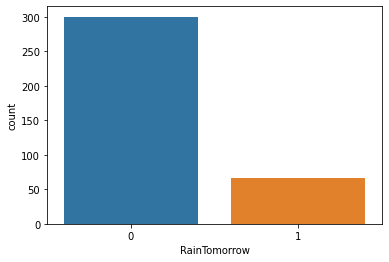

In [18]:
sns.countplot(x='RainTomorrow',data=df)

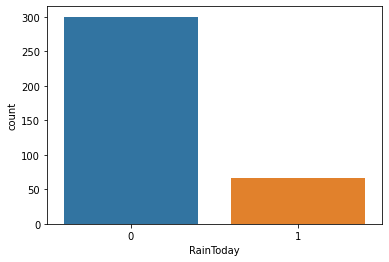

In [19]:
sns.countplot(x='RainToday',data=df)

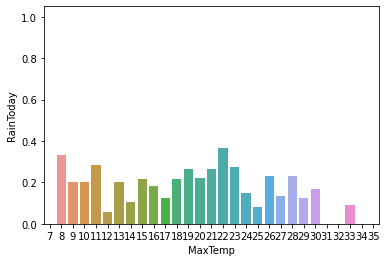

In [20]:
sns.barplot(data=df, x="MaxTemp", y="RainToday",errwidth=0)

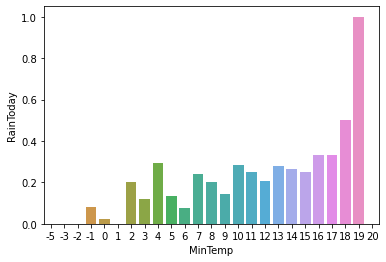

In [21]:
sns.barplot(data=df, x="MinTemp", y="RainToday",errwidth=0)

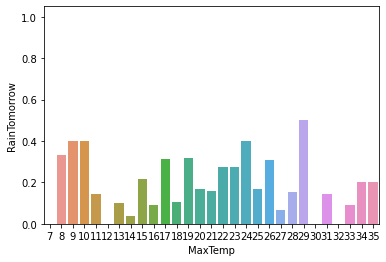

In [22]:
sns.barplot(data=df, x="MaxTemp", y="RainTomorrow",errwidth= 0)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


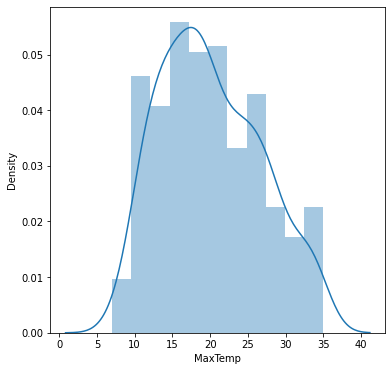

In [23]:
plt.figure(figsize=(6,6))
sns.distplot(df['MaxTemp'])

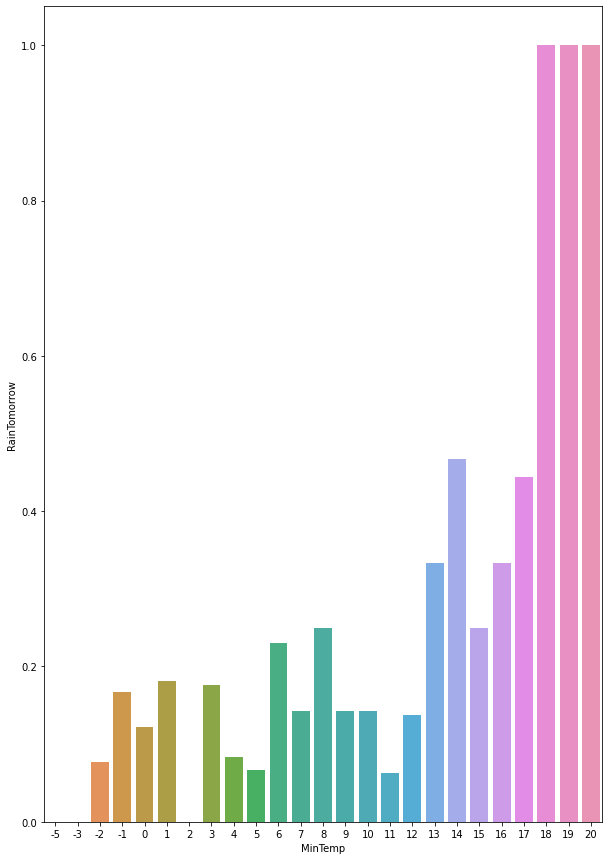

In [24]:
plt.figure(figsize=(10,15))
sns.barplot(data =df, x="MinTemp",y="RainTomorrow",errwidth=0)

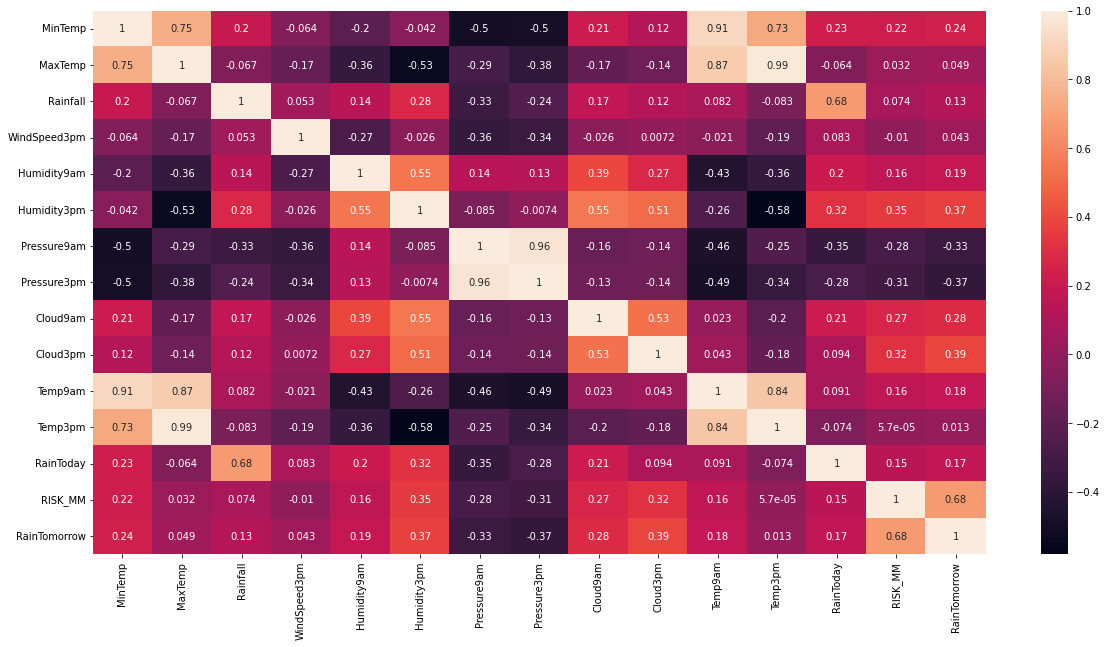

In [25]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)

# Prediction using Machine Learning **Algorithm**

In [26]:
X=df.drop("RainTomorrow",axis=1)
y=df["RainTomorrow"]
df.head(5)

,MinTemp,MaxTemp,Rainfall,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8,24,0,20,68,29,1019,1015,7,7,14,23,0,3,1
1,14,26,3,17,80,36,1012,1008,5,3,17,25,1,3,1
2,13,23,3,6,82,69,1009,1007,8,7,15,20,1,39,1
3,13,15,39,24,62,56,1005,1007,2,7,13,14,1,2,1
4,7,16,2,28,68,49,1018,1018,7,7,11,15,1,0,0


In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.7,random_state=1)

Accuracy 97.66536964980544


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


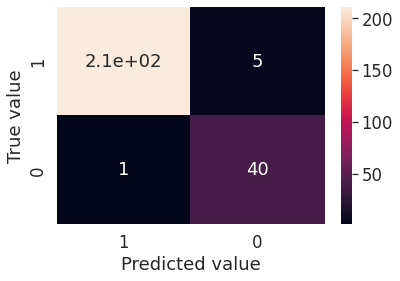

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
LR=LogisticRegression()
logmodel = LR.fit(X_train,y_train)
Y_pred=LR.predict(X_test)
print("Accuracy",LR.score(X_test,y_test)*100)
sns.set(font_scale=1.5)
cm=confusion_matrix(Y_pred,y_test)
sns.heatmap(cm,annot=True,xticklabels=[1,0],yticklabels=[1,0])
plt.xlabel("Predicted value")
plt.ylabel("True value")
plt.show()


Accuracy :  98.44357976653697


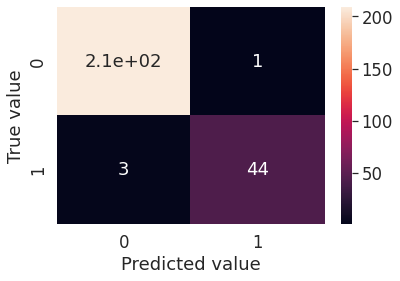

In [29]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
logmodel =  DT.fit(X_train,y_train)
Y_pred = DT.predict(X_test)
print("Accuracy : ",DT.score(X_test,y_test)*100)
sns.set(font_scale=1.5)
cm = confusion_matrix(Y_pred,y_test)
sns.heatmap(cm,annot=True,xticklabels=[0,1],yticklabels=[0,1])
plt.xlabel("Predicted value")
plt.ylabel("True value")
plt.show()

In [30]:
def classify(num):
    if num==0:
        return 'No rain tomorrow'
    else:
        return 'Rain tomorrow'

In [31]:
pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.6 MB 8.3 MB/s 
     |████████████████████████████████| 55 kB 3.8 MB/s 
     |████████████████████████████████| 84 kB 4.5 MB/s 
     |████████████████████████████████| 213 kB 102.2 MB/s 
     |████████████████████████████████| 84 kB 3.6 MB/s 
     |████████████████████████████████| 54 kB 3.5 MB/s 
     |████████████████████████████████| 106 kB 77.4 MB/s 
     |████████████████████████████████| 2.3 MB 60.5 MB/s 
     |████████████████████████████████| 56 kB 5.4 MB/s 
     |████████████████████████████████| 278 kB 80.7 MB/s 
     |████████████████████████████████| 64 kB 3.4 MB/s 
     |████████████████████████████████| 80 kB 9.6 MB/s 
     |████████████████████████████████| 68 kB 8.5 MB/s 
     |████████████████████████████████| 68 kB 8.8 MB/s 
     |████████████████████████████████| 68 kB 8.1 MB/s 
     |████████████████████████████████| 68 kB 7.5 

In [32]:
import gradio as gr
import numpy as np

def predict_weather(MinTemp,MaxTemp,Rainfall,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM):
    input_array=np.array([[MinTemp,MaxTemp,Rainfall,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM]])
    prediction=logmodel.predict(input_array)
    output=classify(prediction[0])
    if output=='No rain tomorrow':
      return [(0,output)]
    else:
      return [(1,output)]

In [33]:
MinTemp = gr.inputs.Slider(minimum=0, maximum=24, default=0, label="Minimum Temperature")
MaxTemp = gr.inputs.Slider(minimum=0, maximum=40, default=0, label="Max Temperature")
Rainfall = gr.inputs.Slider(minimum=0, maximum=40, default=0, label="Rainfall")
WindSpeed3pm = gr.inputs.Slider(minimum=0, maximum=50, default=0, label="Wind speed at 3pm")
Humidity9am = gr.inputs.Slider(minimum=0, maximum=100, default=0, label="Humidity at 9am")
Humidity3pm = gr.inputs.Slider(minimum=0, maximum=100, default=0, label="Humidity at 3pm")
Pressure9am = gr.inputs.Slider(minimum=0, maximum=1035, default=0, label="Pressure at 9am")
Pressure3pm = gr.inputs.Slider(minimum=0, maximum=1035, default=0, label="Pressure at 3pm")
Cloud9am = gr.inputs.Slider(minimum=0, maximum=10, default=0, label="Cloud 9am")
Cloud3pm = gr.inputs.Slider(minimum=0, maximum=10, default=0, label="Cloud 3pm")
Temp9am = gr.inputs.Slider(minimum=0, maximum=36, default=0, label="Temp 9am")
Temp3pm = gr.inputs.Slider(minimum=0, maximum=36, default=0, label="Temp 3pm")
RainToday = gr.inputs.Slider(minimum=0, maximum=1, default=0, label="Rain today")
RISK_MM = gr.inputs.Slider(minimum=0, maximum=40, default=0, label="Risk MM")

/usr/local/lib/python3.8/dist-packages/gradio/inputs.py:88: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)


In [34]:
result=gr.outputs.HighlightedText(color_map={ "No rain tomorrow": "lightgreen",
        "Rain tomorrow": "pink",})

/usr/local/lib/python3.8/dist-packages/gradio/outputs.py:239: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/gradio/components.py:3169: UserWarning: The 'color_map' parameter has been moved from the constructor to `HighlightedText.style()` 
  warnings.warn(


In [ ]:
gr.Interface(predict_weather, inputs=[MinTemp,MaxTemp,Rainfall,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM], outputs=result,live=True).launch(debug=True,share=True)

/usr/local/lib/python3.8/dist-packages/gradio/blocks.py:218: UserWarning: api_name predict already exists, using predict_1
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/gradio/blocks.py:218: UserWarning: api_name predict already exists, using predict_2
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/gradio/blocks.py:218: UserWarning: api_name predict already exists, using predict_3
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/gradio/blocks.py:218: UserWarning: api_name predict already exists, using predict_4
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/gradio/blocks.py:218: UserWarning: api_name predict already exists, using predict_5
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/gradio/blocks.py:218: UserWarning: api_name predict already exists, using predict_6
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/gradio/blocks.py:218: UserWarning: api_name predict already exists, using predict_7
  warnings.warn(
/usr/local/lib/pytho

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://7d4200014467a020.gradio.app

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces
